In [51]:
#! pip install pandas pm4py numpy
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
FPATH = "ArtificialPatientTreatment.csv"
events = pd.read_csv(FPATH)
events.head()

,patient,action,org:resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [16]:
events.columns = events.columns.str.strip()

In [20]:
case_starts_ends = events.pivot_table(index='patient', aggfunc={'DateTime':['min', 'max']})
case_starts_ends.head()

DateTime                      
                             max                   min
patient                                               
patient 0    2017-01-09 08:29:28   2017-01-02 11:40:11
patient 1    2017-01-06 16:49:21   2017-01-02 12:50:35
patient 10   2017-01-30 11:19:19   2017-01-17 14:13:17
patient 11   2017-02-02 10:13:13   2017-01-19 13:35:20
patient 12   2017-01-27 11:18:57   2017-01-20 11:43:38

In [21]:
case_starts_ends = case_starts_ends.reset_index()

In [22]:
case_starts_ends.columns = ['patient', 'caseend', 'casestart']

In [23]:
case_starts_ends.head()

,patient,caseend,casestart
0,patient 0,2017-01-09 08:29:28,2017-01-02 11:40:11
1,patient 1,2017-01-06 16:49:21,2017-01-02 12:50:35
2,patient 10,2017-01-30 11:19:19,2017-01-17 14:13:17
3,patient 11,2017-02-02 10:13:13,2017-01-19 13:35:20
4,patient 12,2017-01-27 11:18:57,2017-01-20 11:43:38


In [24]:
events = events.merge(case_starts_ends, on='patient')

In [26]:
events.head()

,patient,action,org:resource,DateTime,caseend,casestart
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11


In [32]:
events[['DateTime', 'caseend', 'casestart']] = events[['DateTime', 'caseend', 'casestart']].apply(pd.to_datetime)

In [43]:
events['relativetime'] = events['DateTime'] - events['casestart']
#convert to more friendly measures
events['relativetime_s'] = events['relativetime'].dt.seconds + events['relativetime'].dt.days * 24*3600
events['relativedays'] = events['relativetime'].dt.days

In [46]:
events

,patient,action,org:resource,DateTime,caseend,casestart,relativetime,relativetime_s,relativedays
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3
...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11


<Axes: xlabel='DateTime', ylabel='patient'>

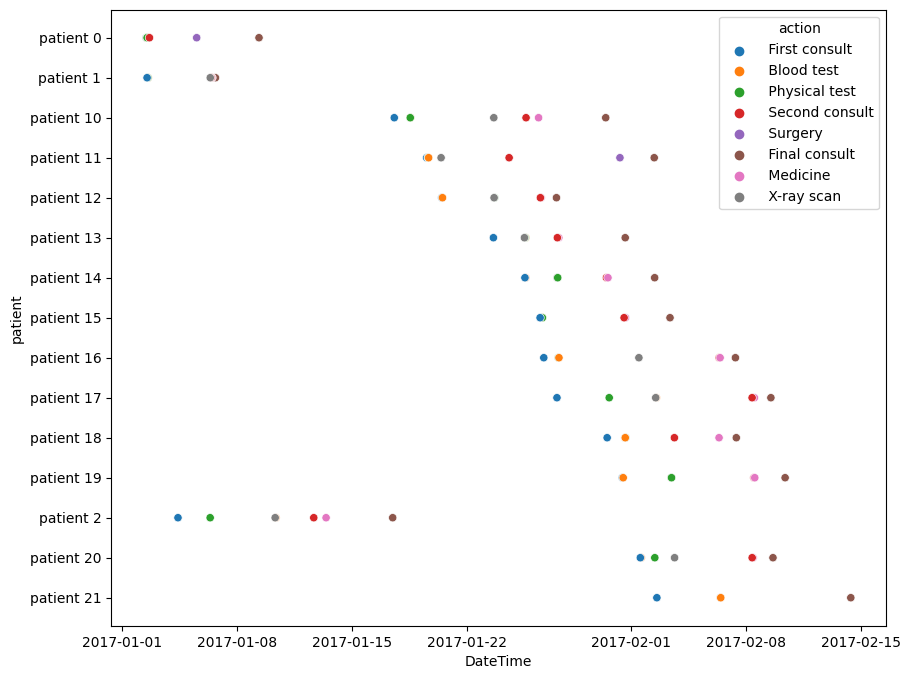

In [61]:
#dotted chart
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='DateTime', y='patient', hue='action', data=events.sort_values(by='patient')[:100])

In [101]:
events['patient_num'] = events.patient.apply(lambda s: int(s.split()[1]))
mask = events.patient_num.isin([x for x in range(0, 100, 5)])
tmp = events[mask]

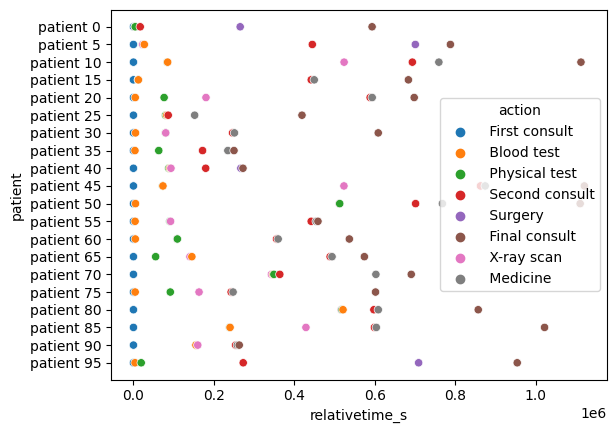

In [91]:
sns.scatterplot(x='relativetime_s', y='patient', hue='action', data=tmp);

In [68]:
#get an idea of the distribution of pprocess duration
sns.scatterplot(x='relativetime_s', y='patient', hue='action', data=tmp);

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [100]:
events['process_length'] = events['caseend'] - events['casestart']
events['process_length_s'] = events['process_length'].dt.seconds + events['process_length'].dt.days * 24 * 3600

<Axes: xlabel='relativetime_s', ylabel='patient'>

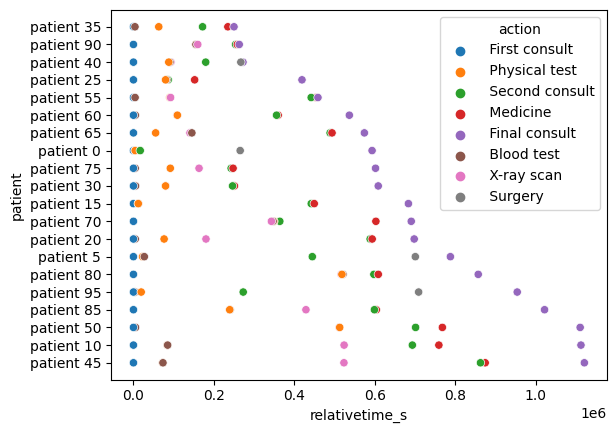

In [106]:
sns.scatterplot(x='relativetime_s', y='patient', hue='action', data=tmp.sort_values(by='process_length_s'))

<Axes: xlabel='DateTime', ylabel='patient'>

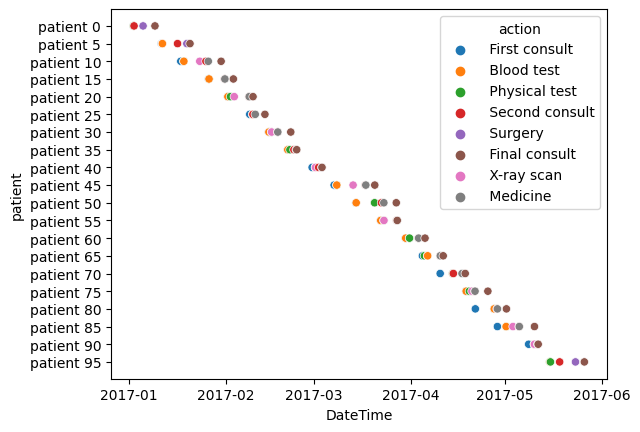

In [109]:
sns.scatterplot(x='DateTime', y='patient', hue='action', data=tmp)

<Axes: xlabel='DateTime', ylabel='org:resource'>

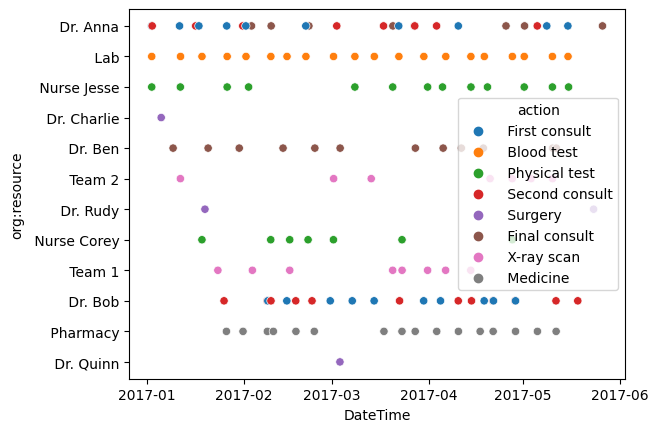

In [115]:
sns.scatterplot(x='DateTime', y='org:resource', hue='action', data=tmp)

In [123]:
#weekly trends 

events['week_day'] = events['DateTime'].dt.day_of_week.apply(int)

In [124]:
events['patient_num'] = events.patient.apply(lambda s: int(s.split()[1]))
mask = events.patient_num.isin([x for x in range(0, 100, 5)])
tmp = events[mask]

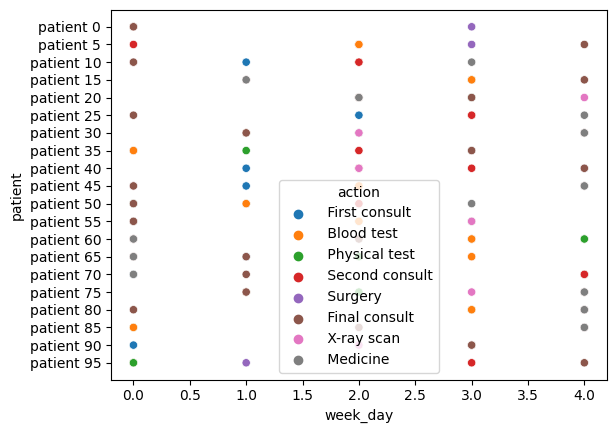

In [130]:
sns.scatterplot(x='week_day', y='patient', hue='action', data=tmp); 

In [313]:
x = tmp.groupby(['week_day', 'action']).agg(
    action_count = ('action', 'count')
).reset_index()

x.groupby('week_day', group_keys=False).apply(lambda x: x.sort_values(by='action_count', ascending=False).head(1))

,week_day,action,action_count
1,0,Final consult,7
9,1,First consult,7
18,2,Physical test,8
21,3,Blood test,5
32,4,Medicine,6


In [354]:
tmp.groupby(["week_day", "action"])['action'].count().nlargest().sort_index() #error ??

week_day  action        
0          Final consult    7
1          First consult    7
2          Blood test       7
           Physical test    8
4          Medicine         6
Name: action, dtype: int64

In [359]:
events.groupby('action')['patient'].count()

action
 Blood test        100
 Final consult     100
 First consult     100
 Medicine           80
 Physical test     100
 Second consult    100
 Surgery            20
 X-ray scan         90
Name: patient, dtype: int64

In [364]:
pd.crosstab(events['patient'], events['action'])

action,Blood test,Final consult,First consult,Medicine,Physical test,Second consult,Surgery,X-ray scan
patient,,,,,,,,
patient 0,1,1,1,0,1,1,1,0
patient 1,1,1,1,1,1,1,0,1
patient 10,1,1,1,1,1,1,0,1
patient 11,1,1,1,0,1,1,1,1
patient 12,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
patient 95,1,1,1,0,1,1,1,0
patient 96,1,1,1,1,1,1,0,1
patient 97,1,1,1,1,1,1,0,1


<Axes: xlabel='action', ylabel='patient'>

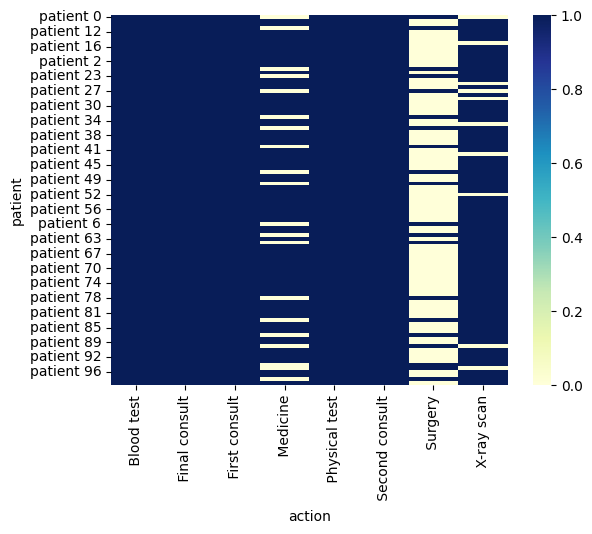

In [366]:
sns.heatmap(pd.crosstab(events['patient'], events['action']), cmap='YlGnBu')

In [368]:
events.action.drop_duplicates()

0       First consult
1          Blood test
2       Physical test
3      Second consult
4             Surgery
5       Final consult
9          X-ray scan
11           Medicine
Name: action, dtype: object

## 2

In [370]:
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

In [373]:
eventlog = pd.read_csv('ArtificialPatientTreatment.csv')

In [378]:
eventlog.columns = eventlog.columns.str.strip()

In [380]:
eventlog = eventlog.rename(
    columns= {
    'DateTime' : 'time:timestamp',
    'patient' : 'case:concept:name',
    'action' : 'concept:name',
    }
)

In [382]:
eventlog.head()

,case:concept:name,concept:name,org:resource,time:timestamp
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [383]:
log = log_converter.apply(eventlog) 

In [385]:
#alpha miner
from pm4py.algo.discovery.alpha import algorithm as alpha_miner 

In [386]:
net, initial_marking, final_marking = alpha_miner.apply(log)